# CDS503 Lab 5 Exercise
* P-COM0118/19 Teoh Rui Wen
* P-COM0137/19 Chu Kah Em

**Question 1**
Explore the data and answer the following:
* What type of attributes of the data?
* Test the margin of the data, is it linearly separable?
* Using a scatter plot, what pattern can you see? Why?

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
df=pd.read_csv("iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape

(150, 6)

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

**The type of the data:**<br>The Id is integer and is key attribute,<br>SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm are quantitative data,<br>Species is categorical data.

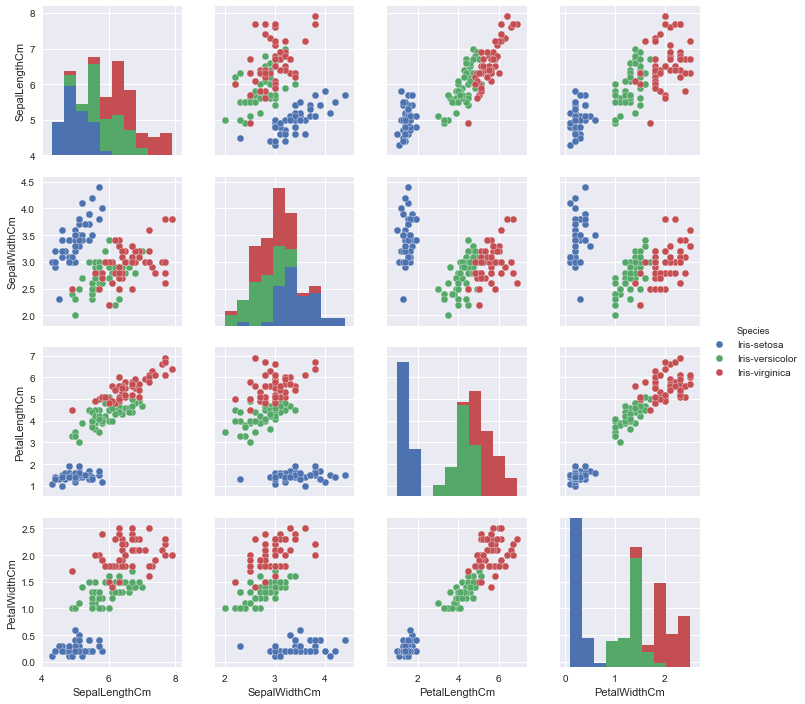

In [5]:
# pair-plot of Iris dataset
sns.pairplot(data=df, vars=('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'),hue = 'Species')

From the scatter plot, we can see that Iris-setosa is able to separate completely from the other two spesies, but the other two spesies, Iris-versicolor and Iris-virginica is closed to each other. We can use a linear margin to separate Iris-setosa from the other two spesies.

In [53]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df1=df[(True^df['Species'].isin([2]))]
df2=df[(True^df['Species'].isin([0]))]
X = df.iloc[:,3:5].values
y = df.iloc[:,5].values
y = le.fit_transform(y.astype(str))
x1=df1.iloc[:,3:5].values
y1=df1.iloc[:,5].values
x2=df2.iloc[:,3:5].values
y2=df2.iloc[:,5].values

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

**Question 2**
Experiment with the SVM algorithm introduced in this lab to predict the class of the iris flower data
( iris.csv ). Use default parameter configurations. Then, try to conduct also cross-validation as per the one
applied in this lab. Compare the algorithms and specify your findings. Answer the following questions:
* Do cross-validation effect algorithms' performance?
* Test SVM with at least two other kernels and compare them to the linear kernel. How much they differ?

# Start from here is online code 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.40)

In [8]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

### kernel = 'linear'

In [59]:
from sklearn.svm import SVC
model1=SVC(decision_function_shape = "ovr", kernel = 'linear',C=1E6) #decision_function_shape = 'ovr', 
model2=SVC(decision_function_shape = "ovr", kernel = 'linear',C=1E6)
model1.fit(x1, y1)
model2.fit(x2,y2)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
"""
Plot the decision function for a 2D SVC
"""
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
  
    ylim = ax.get_ylim()
   
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
  

    y = np.linspace(ylim[0], ylim[1], 30)
  
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
        levels=[-1, 0, 1], alpha=0.5, 
        linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

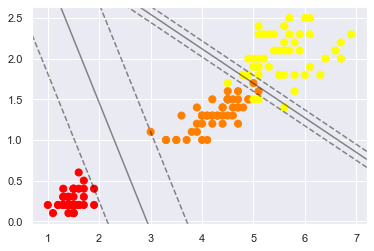

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model1);
plot_svc_decision_function(model2);

In [614]:
pred=model.predict(x_test)

In [477]:
print(confusion_matrix(y_test,pred))

[[22  0  0]
 [ 0 15  1]
 [ 0  0 22]]


In [478]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       1.00      0.94      0.97        16
          2       0.96      1.00      0.98        22

avg / total       0.98      0.98      0.98        60



### kernel = 'rbf'

In [15]:
from sklearn.svm import SVC
model=SVC(kernel = 'rbf',C=1E6)
model.fit(x_train, y_train)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
pred=model.predict(x_test)

In [17]:
print(confusion_matrix(y_test,pred))

[[27  0  0]
 [ 0 16  0]
 [ 0  5 12]]


In [18]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.76      1.00      0.86        16
          2       1.00      0.71      0.83        17

avg / total       0.94      0.92      0.92        60



### kernel = 'poly'

In [19]:
from sklearn.svm import SVC
model=SVC(kernel = 'poly',C=1E6)
model.fit(x_train, y_train)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
pred=model.predict(x_test)

In [21]:
print(confusion_matrix(y_test,pred))

[[27  0  0]
 [ 0 16  0]
 [ 0  3 14]]


In [22]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.84      1.00      0.91        16
          2       1.00      0.82      0.90        17

avg / total       0.96      0.95      0.95        60

